## 프로젝트: 나랑 닮은 연예인을 찾아보자

### Step 1. 사진 모으기

##### import

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import cv2
import face_recognition

%matplotlib inline

##### image data

In [22]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'

### Step2. 얼굴 영역 자르기

In [23]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

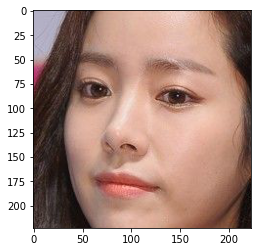

In [24]:
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/images/Hanjimin.jpeg'

cropped_face = get_cropped_face(image_path1)
plt.imshow(cropped_face)

### Step3. 얼굴 영역의 임베딩 추출하기

In [25]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [26]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    print(file_list)
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        print(img_path)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0: 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [27]:
embedding_dict = get_face_embedding_dict(dir_path)

['도아.jpeg', '김경진.png', '공효진.jpg', 'bush.jpeg', '레인보우재경.jpg', '손예진.jpeg', '김남주.jpeg', '류승룡.jpeg', '길.jpg', '강미나.jpg', '박찬호.jpg', '민니.jpg', '리사.jpg', '박명수.jpg', 'Iyou.jpeg', '박재범.jpg', '유지태.jpg', '마동석.jpeg', '리암 니슨.png', '유해진.jpg', '김광현.jpg', '류현진.jpg', '김유정.jpg', '박보영.jpg', '리아.jpg', '박서준.jpeg', 'Parksujune.jpeg', '아이린.jpeg', '로제.jpg', 'clinton.jpeg', 'Parkhyuisoon.jpeg', '이광수.jpg', '김현수.jpeg', 'kaeko.jpeg', 'kongyou.jpeg', '권현빈.jpg', '문별.jpg', 'biden.jpg', '김학범.jpg', '김래원.jpeg', '로저 무어.jpeg', '김영삼.jpeg', '김종서.jpg', 'Parksunyoung.jpeg', '박나래.jpeg', '이경규.jpeg', 'trump.jpg', 'Seungri.jpeg', '꽈두룹.jpeg', '박찬욱.jpeg', '김고은.jpeg', '김상호.png', 'obama.jpg', '박항서.jpg', '박건우.png', 'Sujii.jpeg', 'Jeongwoosung.jpeg', 'Hanjimin.jpeg', '개리.jpg', '유재석.jpg', '김희철.jpg', '유리.jpg', '강동원.jpg', 'kimgura2.jpeg', '미미.jpg', '류승범.jpg', '기성용.jpg', '김대중.jpg', '다니엘 크레이그.jpeg', '로다주.jpeg', 'Songgain.jpeg', '권태원.jpeg', '김연우.jpeg', '대도서관.jpeg', 'reagan.jpg', 'my_image3.jpg', '박성호.jpg', '김민재.jpeg', '나인뮤지스경리.jpg', '김윤석.j

### Step4. 모은 연예인들과 비교하기

In [28]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [29]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [30]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(1, top):
        if sorted_faces[i]:
            print('순위 {}  이름 : {}  거리 : {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    return sorted_faces, sort_key_func

##### 결과

In [31]:
for item in embedding_dict.items():
    print(item[0])

김경진
공효진
bush
레인보우재경
손예진
김남주
류승룡
길
강미나
박찬호
민니
리사
박명수
Iyou
박재범
유지태
마동석
리암 니슨
유해진
김광현
류현진
김유정
박보영
리아
박서준
Parksujune
아이린
로제
clinton
Parkhyuisoon
이광수
김현수
kaeko
kongyou
권현빈
문별
biden
김학범
김래원
로저 무어
김영삼
김종서
Parksunyoung
박나래
이경규
trump
Seungri
꽈두룹
박찬욱
김고은
김상호
obama
박항서
박건우
Sujii
Hanjimin
개리
유재석
김희철
유리
강동원
kimgura2
미미
류승범
기성용
김대중
다니엘 크레이그
로다주
Songgain
권태원
김연우
대도서관
reagan
my_image3
박성호
김민재
나인뮤지스경리
김윤석
박용택
노무현
b1a4진영
Parkwonkyu
박신양
노홍철
마크 러팔로
강민경
Shinsegyeng
류준열
류진
윤아
레오나르도 디카프리오
윤종신
Leeyounhee
kangsora
김C
박진영
곽도원
박해일
문재인
kimgura
서현진


##### 임베딩 거리 측정

In [32]:
sorted_faces, key = get_nearest_face('my_image3')

순위 1  이름 : kaeko  거리 : 0.4344451802680075
순위 2  이름 : kimgura2  거리 : 0.4904853961350342
순위 3  이름 : Songgain  거리 : 0.5020131601094937
순위 4  이름 : Parkwonkyu  거리 : 0.5034787446326384
순위 5  이름 : Parkhyuisoon  거리 : 0.5130724696629303


##### My image

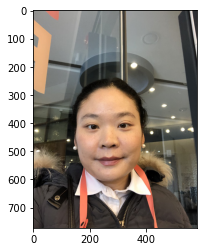

In [33]:
my_image = image_path + 'my_image3.jpg'
plt.imshow(face_recognition.load_image_file(my_image))

##### 닮은 연예인 Top 5

In [34]:
import matplotlib.font_manager as fm

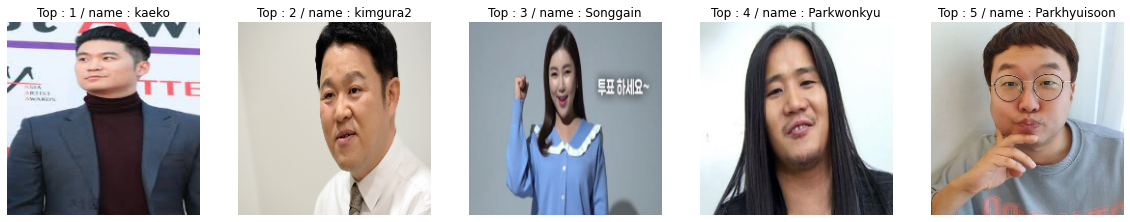

In [35]:
rc('font', family="DejaVu Sans")
plt.figure(figsize=(20,20))
for idx, image_ in enumerate(sorted_faces[1:6]):
    plt.subplot(1,5,idx+1)
    image = image_path + image_[0] + '.jpeg'
    result = face_recognition.load_image_file(image)
    resized = cv2.resize(result, (200, 200))
    plt.imshow(resized)
    title = 'Top : {} / name : {}'.format(idx+1, image_[0])
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

### 느낀점 (회고)

닮은 순위 top 5 연예인들의 임베딩 거리를 측정하였고, 결과는 다음과 같았습니다.

|순위|이름|거리|
|------|:---|:---|
|1|kaeko|0.4344451802680075|
|2|kimgura2|0.4904853961350342|
|3|Songgain|0.5020131601094937|
|4|Parkwonkyu|0.5034787446326384|
|5|Parkhyuisoon|0.5130724696629303|

결과를 바탕으로 5명의 사진을 출력해보았습니다.